# Heart Failure Prediction Project
https://github.com/mrpete5/supervised-learning.git

## Problem Description
This project focuses on predicting whether a patient has heart disease based on their health metrics. Using supervised machine learning techniques, it aims to classify patients into two categories:
- **1**: Presence of heart disease
- **0**: No heart disease

The task involves analyzing patient health data, such as age, cholesterol levels, and ECG results, to build models that can effectively differentiate between these two groups.

- **Goal**: The goal of this project is to develop a reliable classification model that supports early detection of heart disease. Early and accurate diagnoses can significantly improve patient outcomes by enabling timely medical intervention.
- **Type of Learning**: Supervised Learning
- **Task**: Binary Classification
- **Models**: Logistic Regression, Random Forest, Gradient Boosting

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [194]:
data = pd.read_csv('heart.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Dataset Overview

The dataset contains 918 samples (rows) and 12 columns, including 11 independent features and 1 target variable (`HeartDisease`). It consists of both numerical and categorical data that describe patient demographics and health metrics.

### Data Description
- **Number of Samples (Rows)**: 918  
- **Number of Features (Columns)**: 12 (11 features + 1 target variable)  
- **File Size**: Under 1 MB
- **Data Types**:  
  - **Numerical**: Age, RestingBP, Cholesterol, MaxHR, Oldpeak  
  - **Categorical**: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope  
  - **Target Variable**: `HeartDisease` (binary: 1 for presence, 0 for absence)

### Key Features
1. **Age**: Patient's age (years) [Numerical]
2. **Sex**: Sex of the patient (M: Male, F: Female) [Categorical]
3. **ChestPainType**: Type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic) [Categorical]
4. **RestingBP**: Resting blood pressure (mm Hg) [Numerical]
5. **Cholesterol**: Serum cholesterol level (mm/dl) [Numerical]
6. **FastingBS**: Fasting blood sugar (1 if >120 mg/dl, 0 otherwise) [Categorical]
7. **RestingECG**: Resting electrocardiogram results (Normal, ST, LVH) [Categorical]
8. **MaxHR**: Maximum heart rate achieved (60-202) [Numerical]
9. **ExerciseAngina**: Presence of exercise-induced angina (Y: Yes, N: No) [Categorical]
10. **Oldpeak**: ST depression induced by exercise relative to rest [Numerical]
11. **ST_Slope**: Slope of the peak exercise ST segment (Up, Flat, Down) [Categorical]

### Source
The dataset was retrieved from Kaggle and compiled from five independent datasets in the UCI Machine Learning Repository. It was designed to include 11 common features across these datasets, making it comprehensive and widely usable for research.

- **Original Source**: UCI Machine Learning Repository - [Index of Heart Disease Datasets](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)  
- **Dataset Provider**: Kaggle  

### Citation
fedesoriano. (September 2021). *Heart Failure Prediction Dataset*. Retrieved December 2024 from [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).


## Data Cleaning

### Overview
The dataset was analyzed to identify missing values, incorrect data types, outliers, and potential class imbalances. Since the dataset is relatively clean, only minimal cleaning steps were required to prepare it for analysis.


In [195]:
# Check for missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Missing Values
The dataset contains no missing values, so no removal was necessary.

In [196]:
# Label encoding for binary categorical variables
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['FastingBS'] = data['FastingBS'].map({1: 1, 0: 0})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 1, 'N': 0})

# One-hot encoding for non-binary categorical variables
data = pd.get_dummies(data, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ST_Slope_Down      918 non

### Data Type Validation
All features were validated to ensure correct data types. The categorical variables such as `Sex`, `FastingBS`, and `ExerciseAngina` were encoded using label encoding, while the nominal categorical variables (`ChestPainType`, `RestingECG`, and `ST_Slope`) were one-hot encoded to ensure compatibility with machine learning models. The target variable `HeartDisease` is already in a suitable binary format (1 for presence, 0 for absence).

The updated dataset now contains numerical representations for all categorical variables, and the data types of all features are correct for further analysis and modeling.


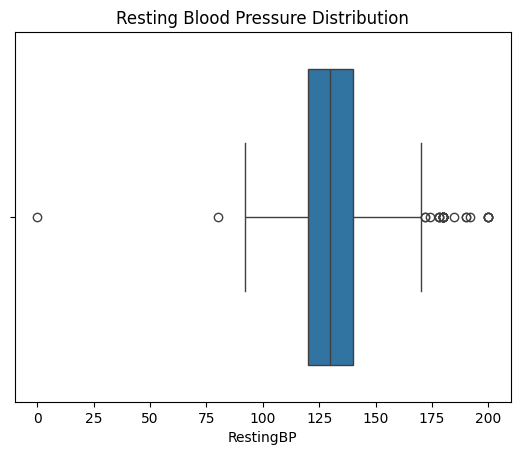

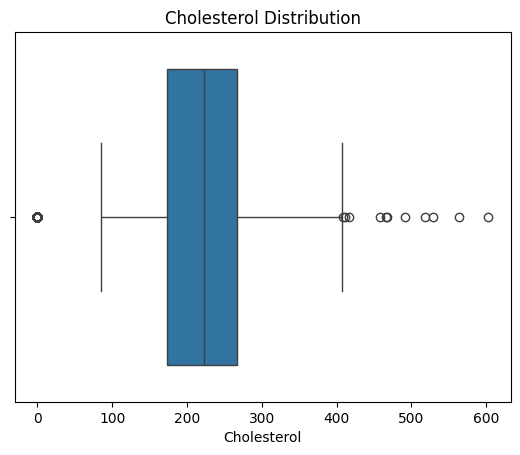

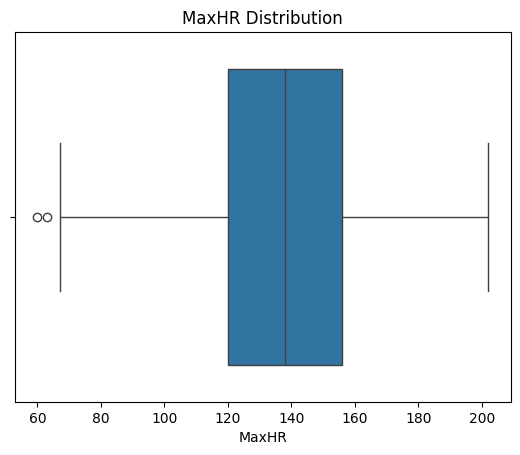

In [197]:
# Box plots for numerical features to detect outliers
sns.boxplot(x=data['RestingBP'])
plt.title('Resting Blood Pressure Distribution')
plt.show()

sns.boxplot(x=data['Cholesterol'])
plt.title('Cholesterol Distribution')
plt.show()

sns.boxplot(x=data['MaxHR'])
plt.title('MaxHR Distribution')
plt.show()

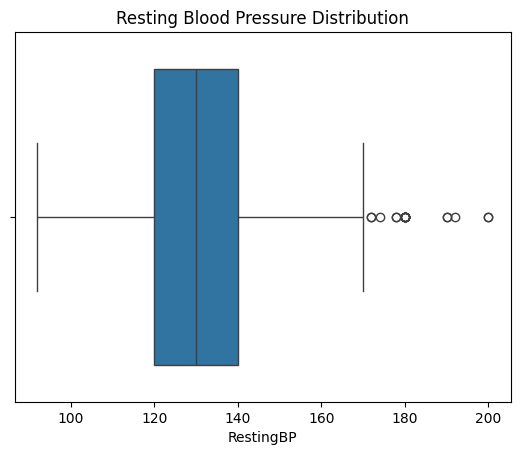

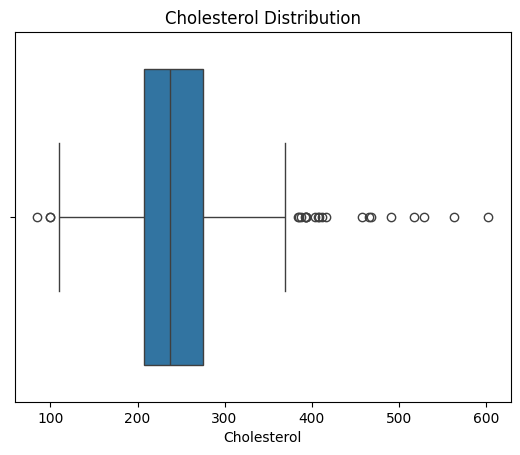

In [198]:
# Remove rows where 'RestingBP' or 'Cholesterol' are 0
data_cleaned = data[(data['RestingBP'] != 0) & (data['Cholesterol'] != 0)]

sns.boxplot(x=data_cleaned['RestingBP'])
plt.title('Resting Blood Pressure Distribution')
plt.show()

sns.boxplot(x=data_cleaned['Cholesterol'])
plt.title('Cholesterol Distribution')
plt.show()


### Zero Value Removal

Rows where the values of `RestingBP` or `Cholesterol` were `0` were removed, as these values are considered invalid outliers. After this step, the dataset is cleaned and ready for further analysis and modeling.


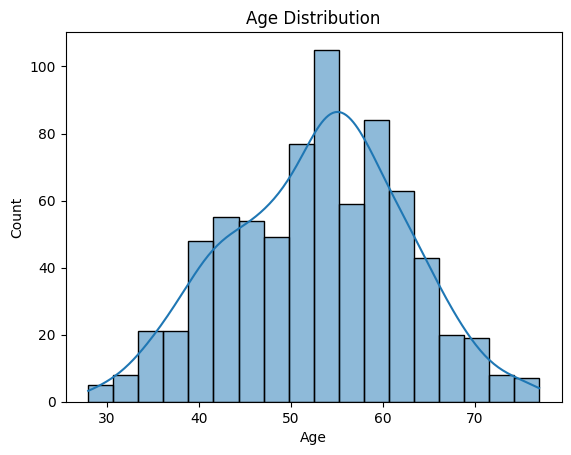

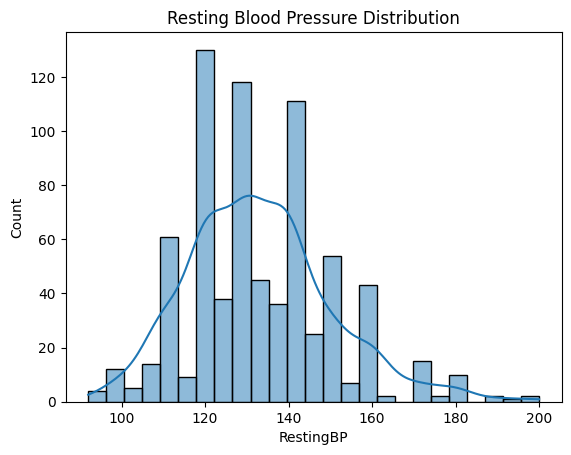

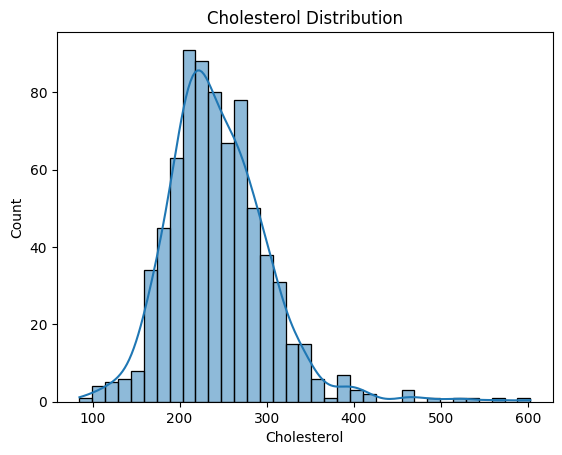

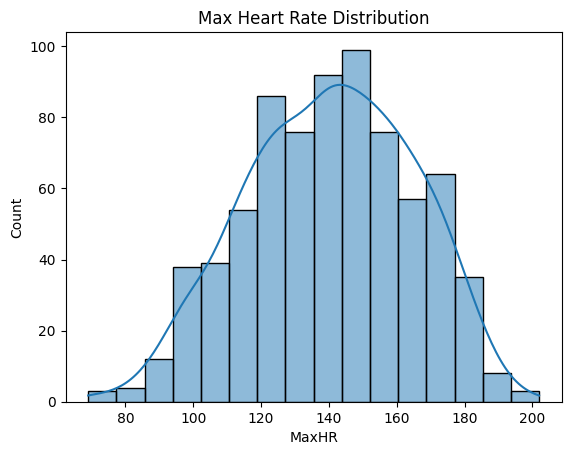

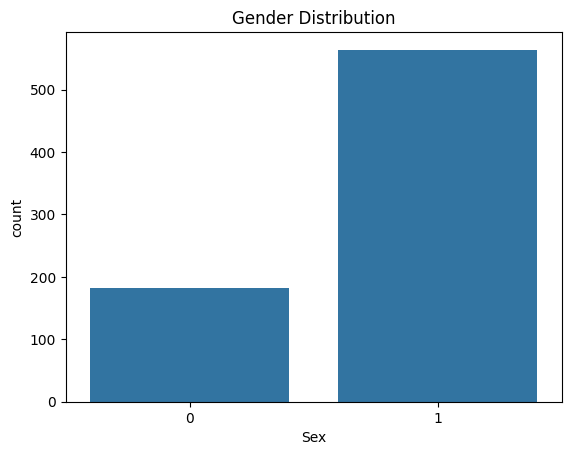

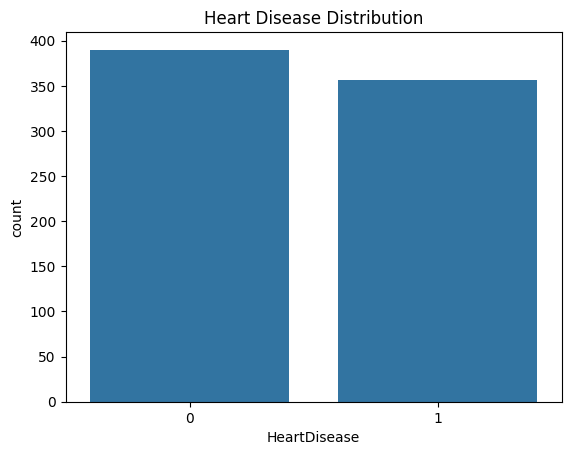

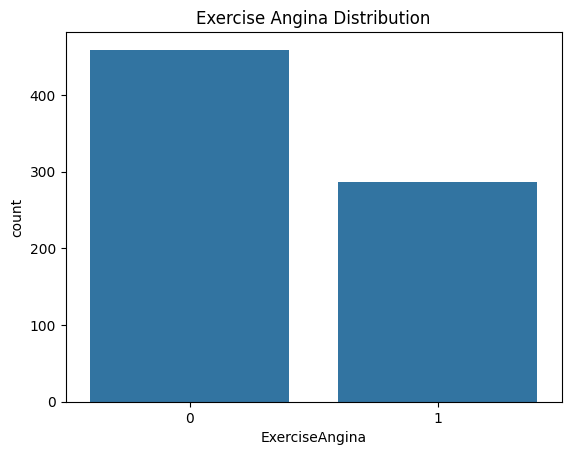

In [199]:
# Univariate analysis: Distribution of numerical features
sns.histplot(data_cleaned['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data_cleaned['RestingBP'], kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

sns.histplot(data_cleaned['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')
plt.show()

sns.histplot(data_cleaned['MaxHR'], kde=True)
plt.title('Max Heart Rate Distribution')
plt.show()

# Check for categorical variables
sns.countplot(x=data_cleaned['Sex'])
plt.title('Gender Distribution')
plt.show()

sns.countplot(x=data_cleaned['HeartDisease'])
plt.title('Heart Disease Distribution')
plt.show()

sns.countplot(x=data_cleaned['ExerciseAngina'])
plt.title('Exercise Angina Distribution')
plt.show()

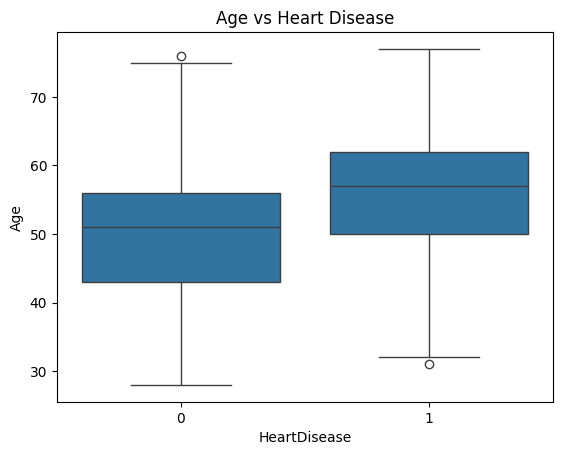

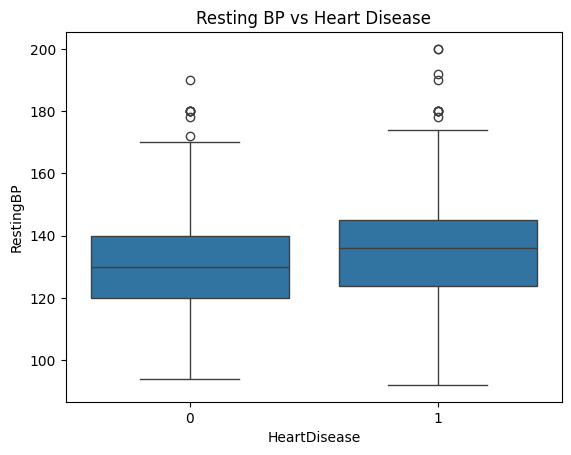

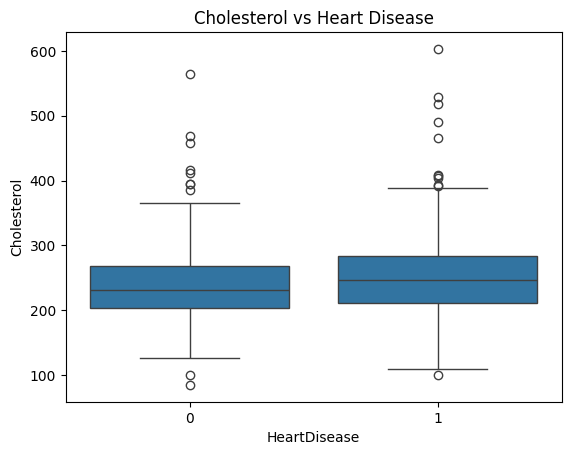

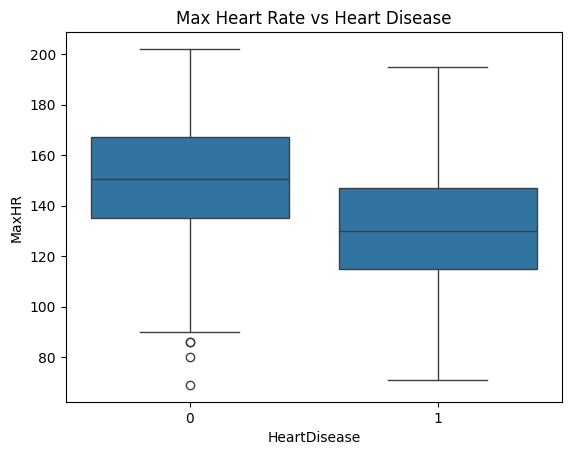

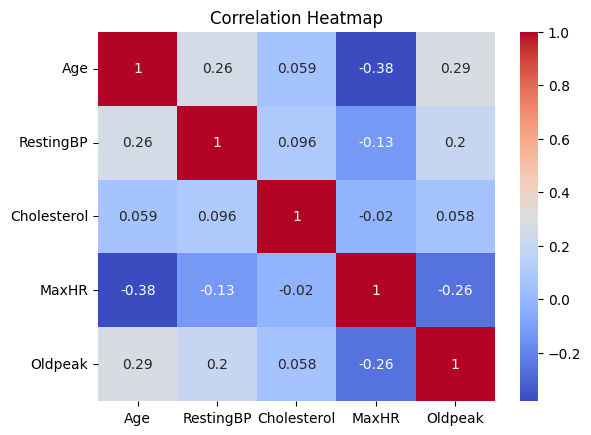

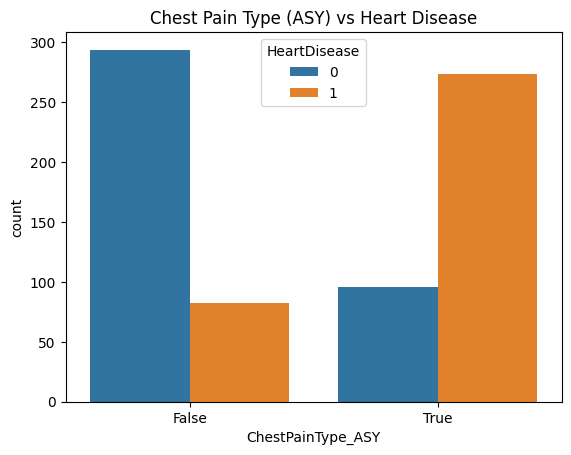

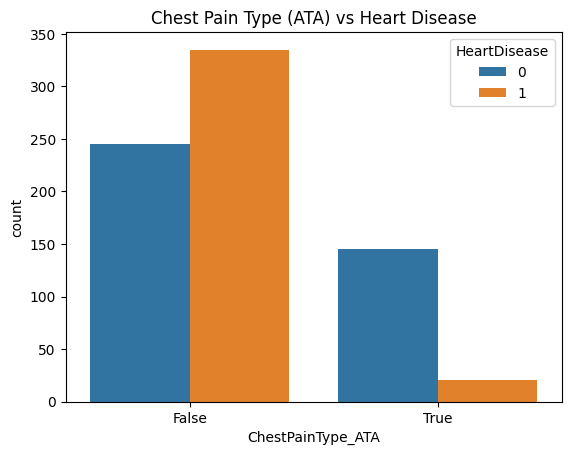

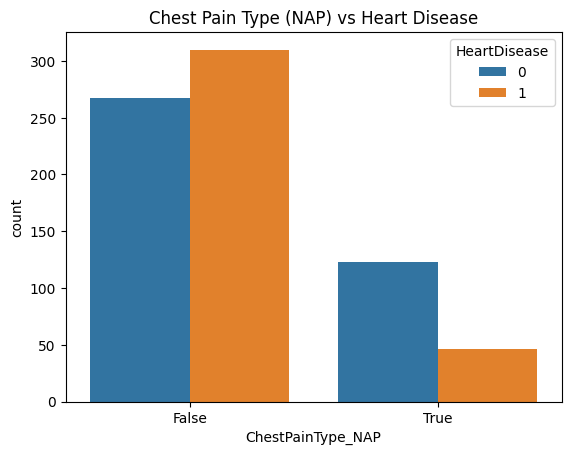

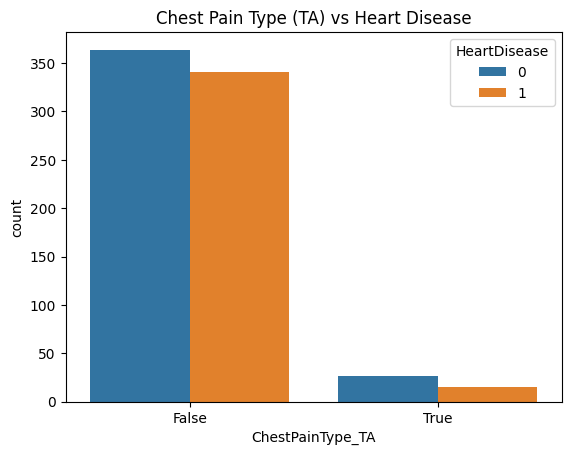

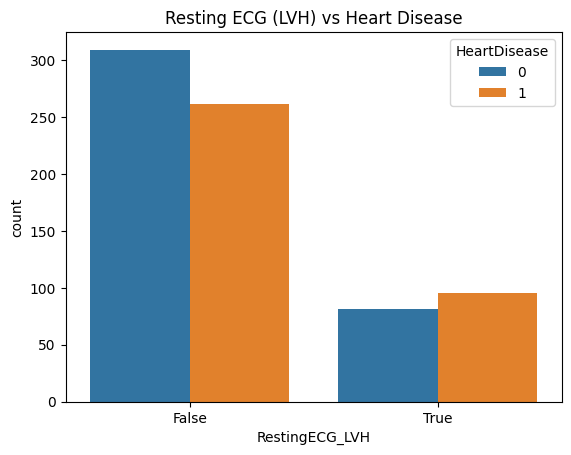

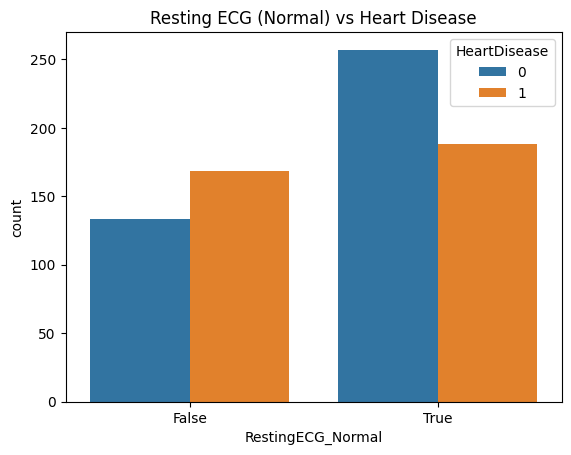

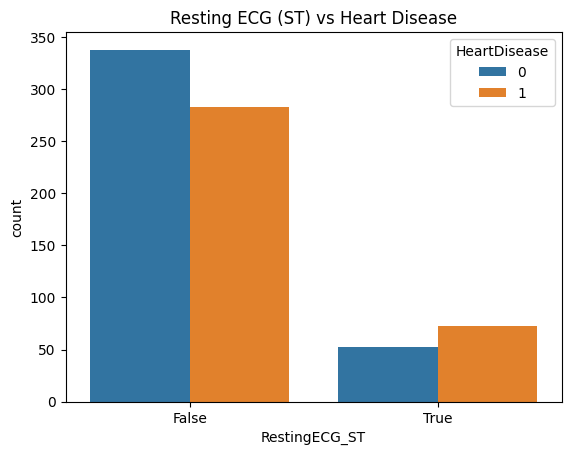

In [200]:
# Bivariate analysis: Relationships between numerical variables and the target 'HeartDisease'

# Distribution of numerical features by 'HeartDisease'
sns.boxplot(x='HeartDisease', y='Age', data=data_cleaned)
plt.title('Age vs Heart Disease')
plt.show()

sns.boxplot(x='HeartDisease', y='RestingBP', data=data_cleaned)
plt.title('Resting BP vs Heart Disease')
plt.show()

sns.boxplot(x='HeartDisease', y='Cholesterol', data=data_cleaned)
plt.title('Cholesterol vs Heart Disease')
plt.show()

sns.boxplot(x='HeartDisease', y='MaxHR', data=data_cleaned)
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

# Correlation heatmap between numerical features
corr = data_cleaned[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot count for one-hot encoded 'ChestPainType' columns
sns.countplot(x='ChestPainType_ASY', hue='HeartDisease', data=data_cleaned)
plt.title('Chest Pain Type (ASY) vs Heart Disease')
plt.show()

sns.countplot(x='ChestPainType_ATA', hue='HeartDisease', data=data_cleaned)
plt.title('Chest Pain Type (ATA) vs Heart Disease')
plt.show()

sns.countplot(x='ChestPainType_NAP', hue='HeartDisease', data=data_cleaned)
plt.title('Chest Pain Type (NAP) vs Heart Disease')
plt.show()

sns.countplot(x='ChestPainType_TA', hue='HeartDisease', data=data_cleaned)
plt.title('Chest Pain Type (TA) vs Heart Disease')
plt.show()

# Plot count for one-hot encoded 'RestingECG' columns
sns.countplot(x='RestingECG_LVH', hue='HeartDisease', data=data_cleaned)
plt.title('Resting ECG (LVH) vs Heart Disease')
plt.show()

sns.countplot(x='RestingECG_Normal', hue='HeartDisease', data=data_cleaned)
plt.title('Resting ECG (Normal) vs Heart Disease')
plt.show()

sns.countplot(x='RestingECG_ST', hue='HeartDisease', data=data_cleaned)
plt.title('Resting ECG (ST) vs Heart Disease')
plt.show()


### Exploratory Data Analysis (EDA)

#### Univariate Analysis:
- The distributions of `Age`, `RestingBP`, `Cholesterol`, and `MaxHR` were examined using histograms and KDE plots. Most of these variables have a normal or slightly skewed distribution.
- The categorical variables such as `Sex`, `HeartDisease`, and `ExerciseAngina` were visualized using count plots to examine their distribution.

#### Bivariate Analysis:
- **Numerical Features**: Box plots were used to compare the distributions of `Age`, `RestingBP`, `Cholesterol`, and `MaxHR` between patients with and without heart disease. The results indicated that heart disease patients tend to have higher values for `Age`, `RestingBP`, and `Cholesterol`, and lower values for `MaxHR`.
- **Categorical Features**: Count plots were used to investigate the relationship between categorical features (`ChestPainType` and `RestingECG`) and the target variable `HeartDisease`.

#### Correlation:
- A correlation heatmap was generated to investigate relationships between numerical variables. `Age` and `Oldpeak` showed the highest correlation with 0.29, while `Age` had the highest inverse relationship with `MaxHR` with -0.38. The correlation coefficients between the different features range from -0.38 to 0.29, indicating weak to moderate relationships.

This analysis provides valuable insights into how the variables are distributed and related to heart disease, informing the model-building process.


### Model Building

In [201]:
X = data_cleaned.drop('HeartDisease', axis=1)
y = data_cleaned['HeartDisease']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the numeric features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_logreg))

Logistic Regression Accuracy: 0.8533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86        78
           1       0.83      0.88      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

ROC-AUC Score: 0.9186253561253561


In [202]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Random Forest Accuracy: 0.8733333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        78
           1       0.85      0.89      0.87        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

ROC-AUC Score: 0.936698717948718


In [203]:
# Gradient Boosting (XGBoost)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Gradient Boosting Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83        78
           1       0.82      0.81      0.81        72

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

ROC-AUC Score: 0.9097222222222222


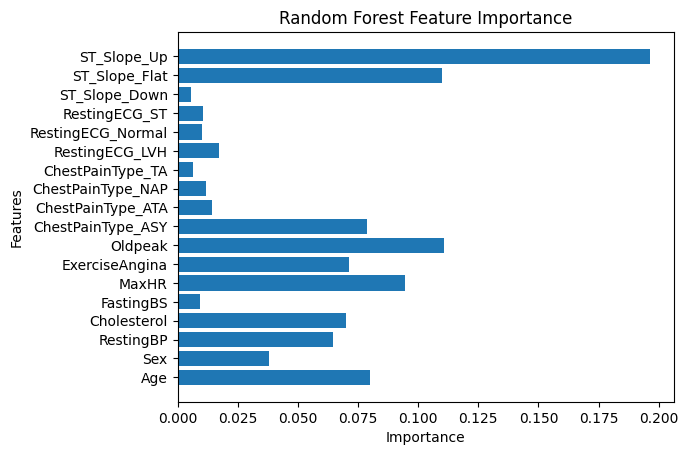

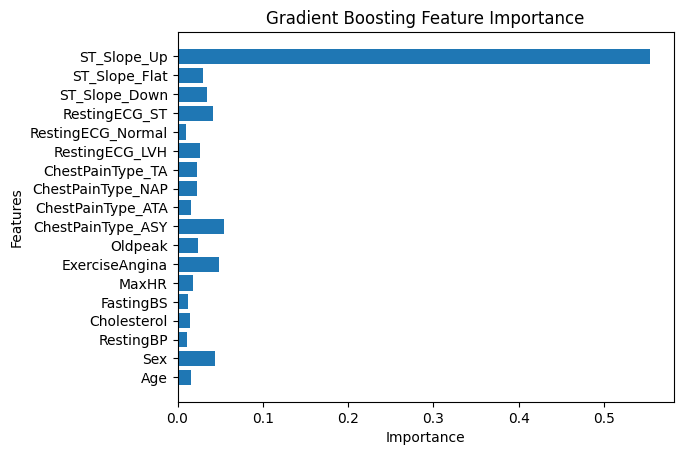

In [204]:
# Random Forest feature importance
importances_rf = rf.feature_importances_
features_rf = X.columns
plt.barh(features_rf, importances_rf)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Gradient Boosting feature importance
importances_xgb = xgb.feature_importances_
features_xgb = X.columns
plt.barh(features_xgb, importances_xgb)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

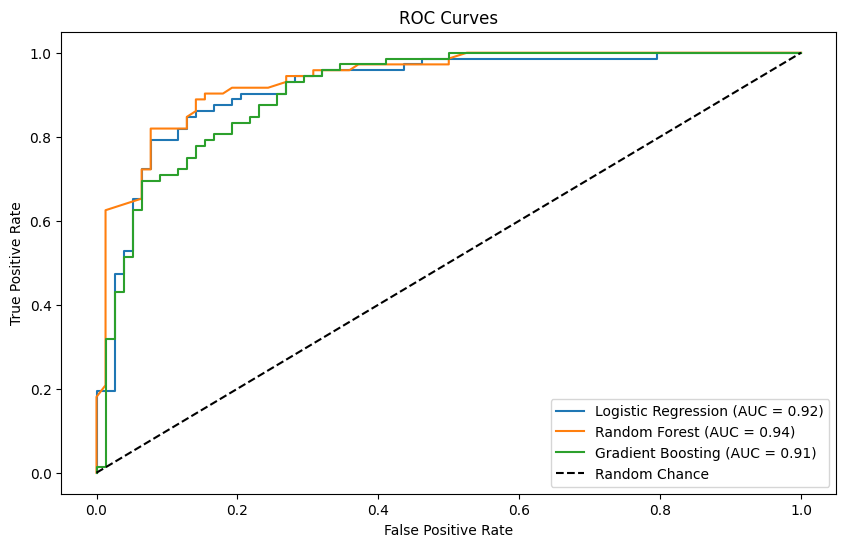

In [205]:
# Compute ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_logreg)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_rf)))
plt.plot(fpr_xgb, tpr_xgb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_xgb)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Results and Analysis

#### Performance Comparison Table

| Model              | Accuracy | Precision (1) | Recall (1) | F1-score (1) | ROC-AUC  |
|--------------------|----------|----------------|------------|--------------|----------|
| Logistic Regression | 0.85     | 0.83           | 0.88       | 0.85         | 0.9186   |
| Random Forest       | 0.87     | 0.85           | 0.89       | 0.87         | **0.9367** |
| Gradient Boosting   | 0.82     | 0.82           | 0.81       | 0.81         | 0.9097   |

---

#### Analysis
1. **Overall Accuracy**:  
   - Random Forest achieved the highest accuracy at **87%**, followed by Logistic Regression at **85%**, and Gradient Boosting at **82%**.

2. **Precision, Recall, and F1-Score**:  
   - **Precision**: Random Forest and Logistic Regression performed slightly better than Gradient Boosting, especially in predicting heart disease.  
   - **Recall**: Random Forest achieved the highest recall (89%) for heart disease cases, which is critical for minimizing false negatives.  
   - **F1-Score**: Random Forest achieved the best balance with an F1-score of **87%** for heart disease predictions, indicating a strong balance between precision and recall.  

3. **ROC-AUC**:  
   - Random Forest had the highest ROC-AUC score (**0.937**), making it the best model for distinguishing between the two classes. Logistic Regression was also strong (**0.919**), while Gradient Boosting performed slightly worse (**0.910**).

---


#### Final Conclusion
- **Best Model**: Random Forest emerged as the best-performing model due to its high accuracy, precision, recall, and the highest ROC-AUC score. It also provides robust feature importance insights.  
- **Trade-offs**: Logistic Regression, being simpler and more interpretable, is a close second and might be preferable in situations where interpretability is key. Gradient Boosting, while slightly underperforming, remains a strong model, especially with potential for hyperparameter tuning.